In [1]:
#https://www.pyimagesearch.com/2017/02/20/text-skew-correction-opencv-python/
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Functions to print the images
def myImPrt(img):
    tmp_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(tmp_img)

def myBWImPrt(img):
    plt.imshow(img,cmap='gray')

In [3]:
def bilateralFilter(image, d, sig):
    image = cv2.bilateralFilter(image, d, sig, sig)
    return image

def threshold(image, t):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret, image = cv2.threshold(image, t, 255, cv2.THRESH_BINARY_INV)
#     ret, image = cv2.threshold(image, t, 255, cv2.THRESH_BINARY)
    return image

def dilate(image, kernalSize):
    kernel = np.ones(kernalSize, np.uint8)
    kernel
    image = cv2.dilate(image, kernel, iterations=1)
    return image


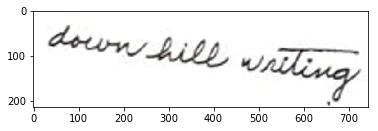

In [4]:
image = cv2.imread('images/tilted.png')
# cv2.imshow('image',image)
myImPrt(image)

In [5]:
# def straighten(image):

#     global BASELINE_ANGLE
BASELINE_ANGLE = 0.0
contour_count=0.0
angle = 0.0
angle_sum = 0.0

(213, 744, 3)

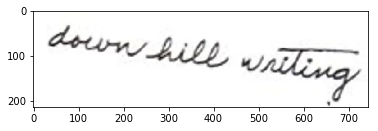

In [6]:
# ref:   https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#ga9d7064d478c95d60003cf839430737ed
filtered = bilateralFilter(image, 5, 50) # see how this works
myImPrt(filtered)
#     cv2.imshow('filtered',filtered)
filtered.shape


(213, 744)

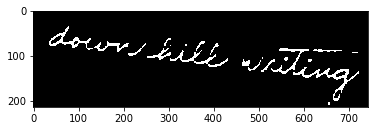

In [7]:
thresh = threshold(filtered, 127)



#     cv2.imshow('thresh',thresh)
myBWImPrt(thresh)
thresh.shape

(213, 744)

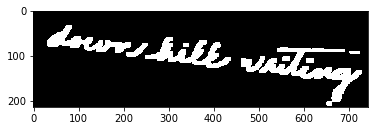

In [8]:
# ref   https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html
dilated = dilate(thresh, (5, 10))
myBWImPrt(dilated)
dilated.shape

(213, 744)

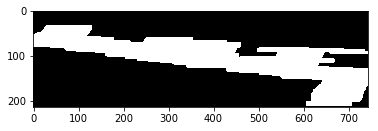

In [9]:
dilated = dilate(thresh, (5, 100))
myBWImPrt(dilated)
dilated.shape

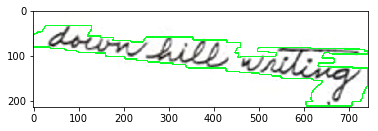

In [10]:
# contours ref https://docs.opencv.org/3.4/d4/d73/tutorial_py_contours_begin.html
im_tmp = image.copy()
im2, ctrs, hier = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(im_tmp,ctrs, -1, (36,255,12), 2)
myImPrt(im_tmp)

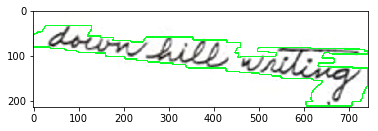

In [11]:
min_area = 5000
for c in ctrs:
    area = cv2.contourArea(c)
    if area > min_area:
#         cv2.drawContours()
        cv2.drawContours(im_tmp,[c], 0, (36,255,12), 2)
myImPrt(im_tmp)

angle of rotation:  -84.9162368774414
1.0


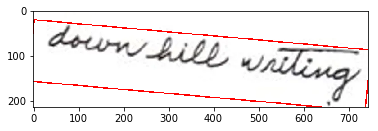

In [12]:
# https://docs.opencv.org/3.1.0/dd/d49/tutorial_py_contour_features.html
# making the text straight and finding the baseline angle
img = image.copy()
for i, ctr in enumerate(ctrs):
    x, y, w, h = cv2.boundingRect(ctr)
    # We extract the region of interest/contour to be straightened.
    roi = image[y:y+h, x:x+w]

#     plt.imshow(roi)
    # minAreaRect is necessary for straightening
    rect = cv2.minAreaRect(ctr)  # it returns  ( center (x,y), (width, height), angle of rotation ). 
    center = rect[0]
    angle = rect[2]
    
    # Drawing rectangle on the image
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    cv2.drawContours(img,[box],0,(0,0,255),2)
    
    print('angle of rotation: ', angle)
    if angle < -45.0:
        angle += 90.0
    
    # ref 2D matrix rotation: https://docs.opencv.org/3.4/da/d54/group__imgproc__transform.html#gafbbc470ce83812914a70abfb604f4326
    rot = cv2.getRotationMatrix2D(((x+w)/2, (y+h)/2), angle, 1)
    #extract = cv2.warpAffine(roi, rot, (w,h), borderMode=cv2.BORDER_TRANSPARENT)
    image[y:y+h, x:x+w] = cv2.warpAffine(roi, rot, (w, h), borderMode=cv2.BORDER_CONSTANT, borderValue=(255, 255, 255))
    # image is overwritten with the straightened contour
    
    angle_sum += angle
    contour_count += 1
    print(contour_count)
myImPrt(img)

contor count =  1.0
Average baseline angle: 5.083763122558594 degree


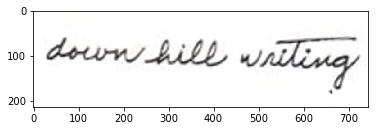

In [13]:
print('contor count = ',contour_count)
if contour_count==0:
    contour_count = 0.000001
mean_angle = angle_sum / contour_count
BASELINE_ANGLE = mean_angle
print ("Average baseline angle: "+str(mean_angle) + " degree")
myImPrt(image)